# IT45 : Take Home Exam 1

## 2/ Sorting algorithms : IntroSort

<p>For this part, i have to choose a sorting algorithm and explain it.
<br/>I choose the introsort which is a kind of merge between a quicksort and the heap sort.<p>

To run this algorithm, as a first step, we need to compute the max depth of the table A that we receive.
<br/>The max depth is computed by : $$maxDepth = [\log{(length(A))}]\times2$$

<p>The idea of this algorithm is to use the quicksort algorithm in the first time and for each step of the problem's division ( refer to divide and conquer strategy), we remove 1 from maxdepth. When maxDepth arrive to 0, we switch to the heap sort instead of quicksort.
<br/>Therefore maxDepth represent maximum depth for recursion, This ensure that the worst-case time complexity is $\mathcal{0}(n\log{}n)$
<br/> Indeed, the quicksort goes, most of the time, very fast but the worst case complexity is $\mathcal{0}(n^{2})$ whereas the worst case complexity of the heapsort is $\mathcal{0}(n\log{}n)$<p>


### QuickSort

<p>QuickSort is one of the most famous and used of sorting algorithm. He is based on the devide and conquer stategy.
<br/>We choose by chance a pivot from the table $T$ we receive and we place this pivot at the right place in the tableby placing all the upper element after and all the lower element before.
<br/>After that we call recursively quicksort two times:<p>
<ul>
    <li>$quicksort(T[1,..,indexofpivot-1])$</li>
    <li>$quicksort(T[1,..,indexofpivot+1])$</li>

</ul>

<p>It is obvious that after a certain number of iteration, all element of the table has been choosed as pivot and the table is sorted.<p>

<p> The average complexity of this algorithm is: $T_{quicksort}(n:number\ of\ element)	\in{\mathcal{0}(n\log{}n)}$ but in the worst case, we have: $T_{quicksort}(n:number\ of\ element)	\in{\mathcal{0}(n^{2})}$<p>

In [34]:
def quickSort(Table):
    if not table:
        return []
    else:
        pivot = table[-1] # We choose as pivot the first element, it is purely arbitrary
        smallerTable = [x for x in Table if x < pivot] # Here , we use divide and conquer stategy, it amounts to split the table in two and place around the pivot
        BiggerTable = [x for x in Table if x >= pivot]
        return quickSort(smallerTable) + [pivot] + quickSort(biggerTable) # We place pivot in the right place and we rebuild the table



[1, 2, 3, 4, 4, 5, 7, 8, 41, 65, 402]


### HeapSort

<p>The idea behind this algorithm is to create a binary tree from the table $T$ we receive.
<br/>The element of index $n$ has two children, the right child wich is the element of index $2n$ and the left child wich is the element of index $2n+1$. <br/>From this binary tree, we search to obtain a heap, namely a binary tree which respect the following properties:<p>
<ul>
    <li>the maximum difference of depth between two leaves is 1.</li>
    <li>the leaves of maximum depth are "heaped" on the left".</li>
    <li>each node has a upper value of these two sons.</li>
</ul>

<p>For convenience, we stand for the binary tree by a table.
<br/>The basic operation is called "sifting" which consists of taking a small tree (one node with two sons) and sorting this tree.
<br/>We start the algorithm by sifting the root of each "subtree" from bottom to the top and from the left to the right.
<br/>After this step, called inital sifting. We switch the last element of the "table" with the root and we restart the sifting from the bottom to the top and from the left to the right.
<br/> We restart these two operations: switching and sifting until the table is sorted.

<p> The complexity of this algorithm is: $T_{heapsort}(n:number\ of\ element)	\in{\mathcal{0}(n\log{}n)}$<p>

In [46]:
def sifting(tree, node, n):
    k = node
    j = 2 * k
    while j <= n:
        if j < n and tree[j] < tree[j+1]:
            j += 1
        if tree[k] < tree[j]:
            tree[k],tree[j] = tree[j],tree[k]
            k = j
            j = 2*k
        else:
            j = n + 1
    return


def heapSort(tree):
    for i in range(len(tree)//2-1,-1,-1):
        sifting(tree, i, len(tree)-1)
    for i in range(len(tree)-1,0,-1):
        tree[i],tree[0] = tree[0],tree[i]
        sifting(tree, 0, i-1)
    return tree

[1, 2, 3, 3, 4, 5, 15, 2845]


### Implementation IntroSort, MergeSort, SelectionSort and plot their times complexity curves

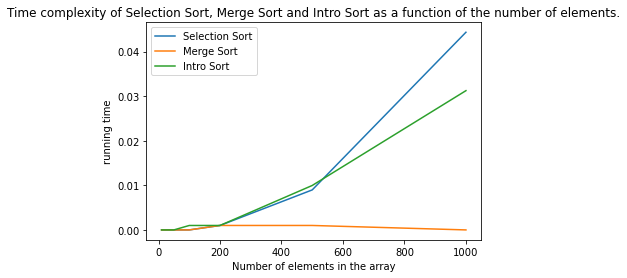

In [78]:
import math
import random
import time
import matplotlib.pyplot as plt

#allow us to generate an unsorted array

def createRandomUnSortedList(num, start = 1, end = 1000): 
    arr = [] 
    tmp = random.randint(start, end) 

    for x in range(num): 

        while tmp in arr: 
            tmp = random.randint(start, end) 

        arr.append(tmp) 

    return arr

#IntroSort

def partition(Table, firstIndex, lastIndex):
    pivot = Table[firstIndex]
    i = firstIndex -1
    j = lastIndex
 
    while True:
        i = i + 1
        while Table[i] < pivot:
            i = i + 1
        j = j - 1
        while Table[j] > pivot:
            j = j - 1
        if i >= j:
            return j
        Table[i], Table[j] = Table[j], Table[i]


def max_heapify(Table, index, firstIndex, lastIndex):
    def left(i):
        return 2*i + 1
    def right(i):
        return 2*i + 2
 
    size = lastIndex - firstIndex
    l = left(index)
    r = right(index)
    if (l < size and Table[firstIndex + l] > Table[firstIndex + index]):
        largest = l
    else:
        largest = index
    if (r < size and Table[firstIndex + r] > Table[firstIndex + largest]):
        largest = r
    if largest != index:
        Table[firstIndex + largest],Table[firstIndex + index] = Table[firstIndex + index],Table[firstIndex + largest]
        max_heapify(Table, largest, firstIndex, lastIndex)

def build_max_heap(Table, firstIndex, LastIndex):
    def parent(i):
        return (i - 1)//2
    length = LastIndex - firstIndex
    index = parent(length - 1)
    while index >= 0:
        max_heapify(Table, index, firstIndex, LastIndex)
        index = index - 1

def heapsort(Table, firstIndex, lastIndex):
    build_max_heap(Table, firstIndex, lastIndex)
    for i in range(firstIndex - 1, lastIndex, -1):
        Table[i], Table[firstIndex] = Table[firstIndex], Table[i]
        max_heapify(Table, index=0, firstIndex=firstIndex, lastIndex=lastIndex)

def introSort(Table,firstIndex, lastIndex, maxDepth): #this function sorts the table from firstIndex to lastIndex - 1 included
    if lastIndex - firstIndex <= 1: # the function returns the result only if the table's length is greater than 1
        return
    elif maxDepth == 0: #we begin to use heapsort instead quicksort when maxdepth = 0
        return heapSort(A, firstIndex, lastIndex)
    else: # this part is the same that a quicksort
        p = partition(Table, firstIndex, lastIndex) # allow us to choose a pivot (element of index firstIndex) and to place it at the right place
        introSort(Table, firstIndex, p + 1, maxDepth -1) #recursive call
        introSort(Table, p + 1, lastIndex, maxDepth - 1)

def sort(Table): #allow to compute maxDepth
    start_time = time.time()
    maxDepth = math.log(len(Table)) * 2
    introSort(Table,0, len(Table), maxDepth)
    tableTimeIntroSort.append(time.time() - start_time)
    
#MergeSort

def mergeSort(A):
    start_time = time.time()
    mergeSortHelper(A)
    tableTimeMergeSort.append(time.time() - start_time)


def mergeSortHelper(A): # we define two functions to avoid issues with the recursion and the array tableTimeMergeSort.

    if len(A) > 1:
        mid = len(A)//2
        B = A[:mid]
        C = A[mid:]
        mergeSortHelper(B)
        mergeSortHelper(C)
        
        #merge between two sorted array
        
        i = 0
        j = 0
        k = 0
        while i < len(B) and j < len(C):
            if B[i] < C[j]:
                A[k] = B[i]
                i = i+1
            else:
                A[k] = C[j]
                j = j+1
            k = k+1
        
        while i < len(B):
            A[k] = B[i]
            i = i+1
            k = k+1
        while j < len(C):
            A[k] = C[j]
            j = j+1
            k = k+1

#SelectionSort

def selectionSort(X):
    start_time = time.time()
    for i in range(len(X)):
        min = i
        for j in range(i+1,len(X)):
            if X[j] < X[min]:
                min = j
        if min != i:
            temp = X[i]
            X[i] = X[min]
            X[min] = temp
    tableTimeSelectionSort.append(time.time() - start_time)
    return X

tableNumberOfElement = [10,50,100,200,500,1000]
tableTimeSelectionSort = []
tableTimeMergeSort = []
tableTimeIntroSort = []
for i in range(len(tableNumberOfElement)):
    T = createRandomUnSortedList(tableNumberOfElement[i])
    selectionSort(T)
    mergeSort(T)
    sort(T)
plt.plot(tableNumberOfElement, tableTimeSelectionSort, label = "Selection Sort")
plt.plot(tableNumberOfElement, tableTimeMergeSort, label = "Merge Sort")
plt.plot(tableNumberOfElement, tableTimeIntroSort, label = "Intro Sort")
plt.legend()
plt.xlabel("Number of elements in the array")
plt.ylabel("running time")
plt.title("Time complexity of Selection Sort, Merge Sort and Intro Sort as a function of the number of elements.")
plt.show()



As we can see for our sample, MergeSort seems to be the most efficient follow by IntroSort and finally the Selection sort is the worst.It is a little weird because MergeSort and IntroSort are supposed to give almost the same result.

### Difference between IntroSort, MergeSort and SelectionSort

<p>As said before, IntroSort is based on two sorting algorithms: QuickSort and HeapSort
<br/>These two algorithms have a common point with the MergeSort algorithm. They use the divide and conquer stategy.
<br/>MergeSort splits its array in half at each step and merge these sorted array after whereas Quicksort divides its array around the index of the pivot and has already sorted its pivot. So, there is a difference in the order.
<br/>The time complexity between Introsort and Mergesort is also the same. ($\mathcal{0}(n\log{}n)$)
<br/>On the other hand, there are nothing in common between IntroSort and SelectionSort. This two algorithms are based on different stategy. We can say that SelectionSort is an intuitive way to sort an array while IntroSort uses a more elaborate and non-intuitive way to sort an array.
<br/>The time complexity of Selectionsort ($\mathcal{0}(n^{2})$) is also much bigger than the Introsort ($\mathcal{0}(n\log{}n)$).<p>
